<div dir="rtl">
    
# מגישים:
## אורן בראל 206590309
## איתי שם טוב 206557852
## מיכאל שמריהו 207375718

In [1]:
#!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
#!pip install ipympl

In [3]:
from sklearn import preprocessing 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
df = pkl.load( open('df_task_1_group_21.pkl', 'rb'))

In [5]:
df.head()

,age,expirience,hour,worker_rank,days_c,toys_c,factories_rand_c,months_c,safety_event
0,30,5,7,2,Wednesday,spinner,Anqing,September,1
1,26,1,7,0,Friday,electric_toys,Anqing,January,0
2,28,0,11,0,Wednesday,spinner,Bengbu,January,0
3,25,0,9,0,Wednesday,puzzels,Bengbu,September,1
4,33,0,5,0,Wednesday,electric_toys,Huangshan,August,0


# Q1

In [6]:
continuous_data = df[['age','expirience','hour','worker_rank']]
continuous_data

,age,expirience,hour,worker_rank
0,30,5,7,2
1,26,1,7,0
2,28,0,11,0
3,25,0,9,0
4,33,0,5,0
...,...,...,...,...
1995,24,7,10,3
1996,26,6,1,3
1997,27,6,8,3
1998,28,6,7,3


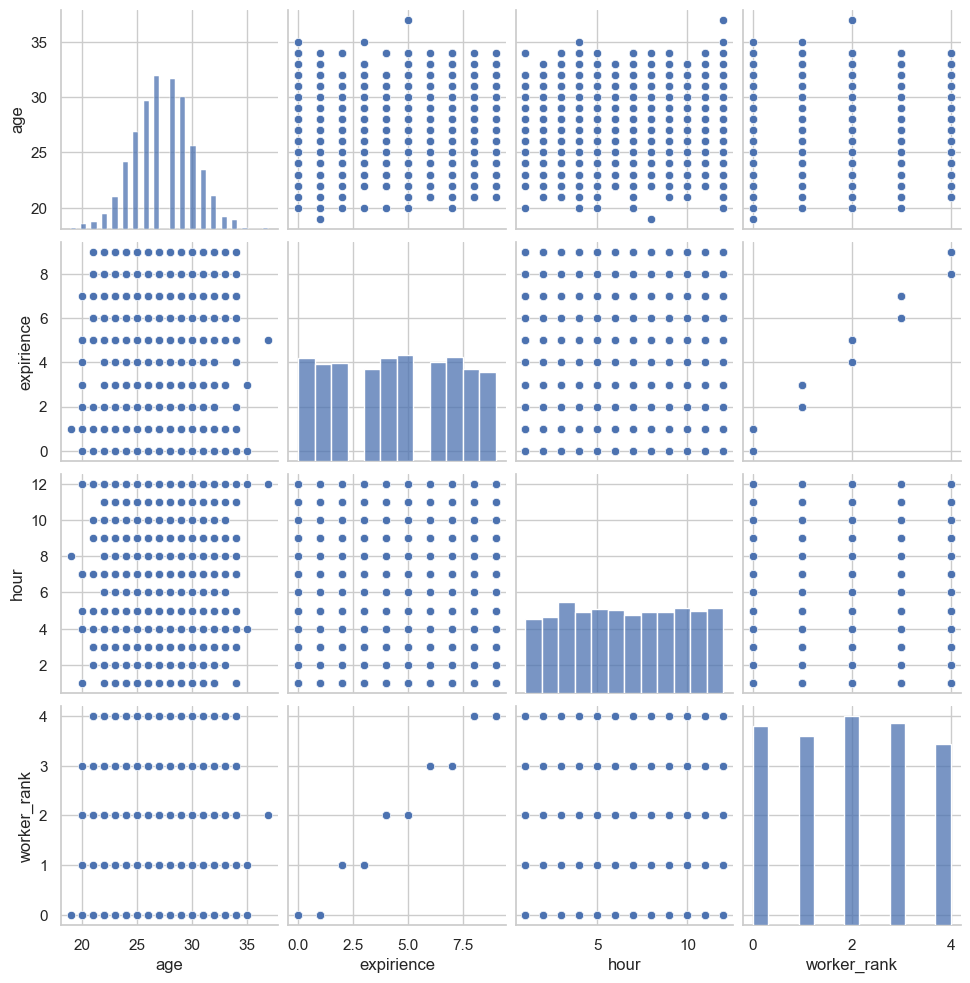

In [7]:
# חישוב הקורלציה
sns.pairplot(continuous_data,height=2.5)
plt.show()

In [8]:
continuous_data.corr(method='pearson')

,age,expirience,hour,worker_rank
age,1.000000,-0.022702,-0.015631,-0.023176
expirience,-0.022702,1.000000,-0.033332,0.984408
hour,-0.015631,-0.033332,1.000000,-0.033014
worker_rank,-0.023176,0.984408,-0.033014,1.000000


# There is corr between expirience and worker_rank

# Q2

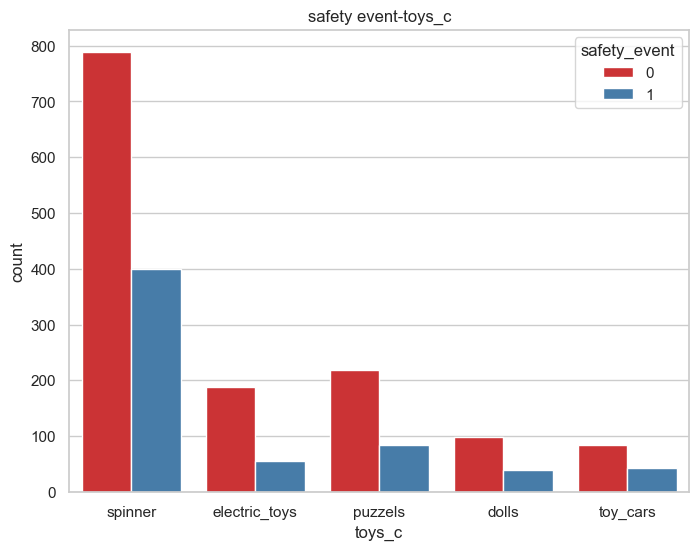

In [9]:
categorical_var1 = 'toys_c'
categorical_var2 = 'factories_rand_c'

plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_var1, hue='safety_event', data=df, palette='Set1')
plt.title(f'safety event-{categorical_var1}')
plt.show()

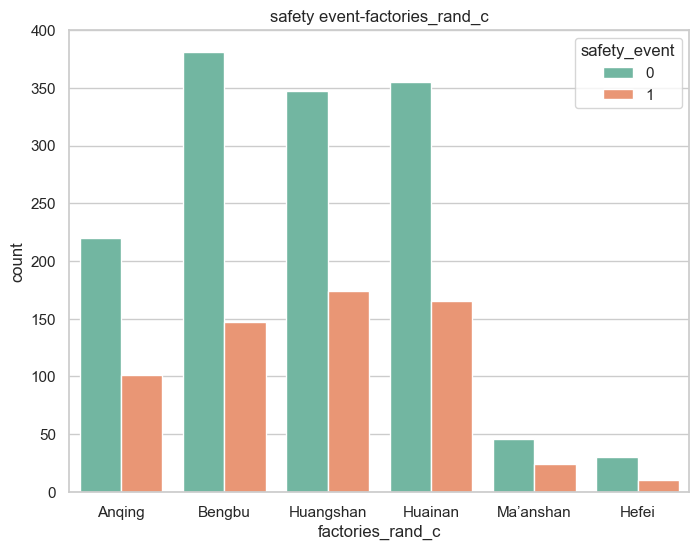

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_var2, hue='safety_event', data=df, palette='Set2')
plt.title(f'safety event-{categorical_var2}')
plt.show()

## The magnitude of the coefficient for each variable is not extreme, so we cannot definitively say which variables we need to remove in prediction.

# Q3 - balanced data

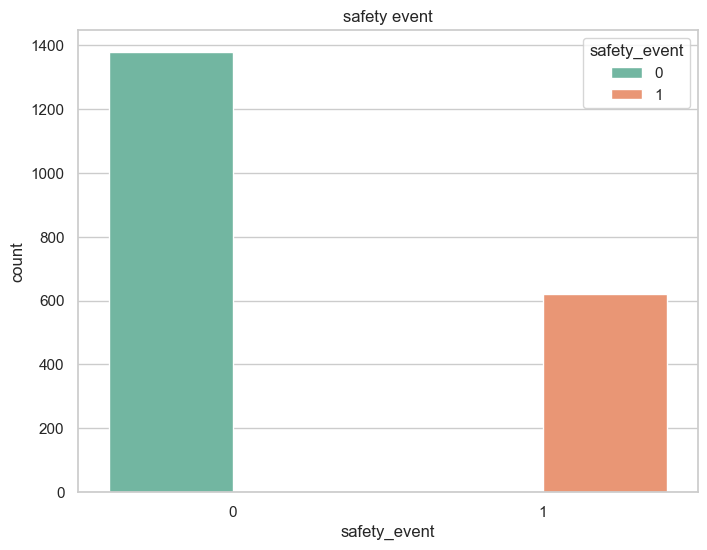

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='safety_event', hue='safety_event', data=df, palette='Set2')
plt.title(f'safety event')
plt.show()

In [12]:
df['safety_event'].value_counts()

0    1379
1     621
Name: safety_event, dtype: int64

In [13]:
chance_to_acc=621/(1379+621)
chance_no_acc=1379/(1379+621)
print('chance_to_acc=',chance_to_acc)
print('chance_no_acc=',chance_no_acc)

chance_to_acc= 0.3105
chance_no_acc= 0.6895


# Since the ratio between accident and non-accident occurrences is relatively significant, it's not certain whether I would utilize data to build a predictive model. However, for now, let's assume the ratio is balanced and proceed with the current dataset.

# Q4 - The distribution of ages

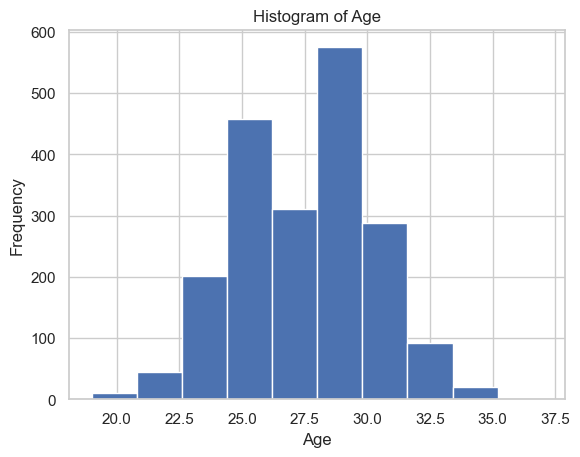

In [14]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
max_age = df['age'].max()
min_age = df['age'].min()
print('Max age=',max_age)
print('Min age=',min_age)
print("The range is",max_age-min_age)

Max age= 37
Min age= 19
The range is 18


In [16]:
df['age'].mean()

27.42

# We can see that ages are distributed normally, therefore the high concentration is around the average

# Q5 - split the data

In [17]:
df.columns

Index(['age', 'expirience', 'hour', 'worker_rank', 'days_c', 'toys_c',
       'factories_rand_c', 'months_c', 'safety_event'],
      dtype='object')

In [18]:
df1=sm.add_constant(df[['age','expirience','hour','worker_rank','safety_event']])
df1

,const,age,expirience,hour,worker_rank,safety_event
0,1.0,30,5,7,2,1
1,1.0,26,1,7,0,0
2,1.0,28,0,11,0,0
3,1.0,25,0,9,0,1
4,1.0,33,0,5,0,0
...,...,...,...,...,...,...
1995,1.0,24,7,10,3,0
1996,1.0,26,6,1,3,1
1997,1.0,27,6,8,3,0
1998,1.0,28,6,7,3,0


In [19]:
cat_vars=['days_c','toys_c','factories_rand_c','months_c']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var,drop_first=True)
    df1=pd.concat([df1,cat_list],axis=1)
df1.columns

Index(['const', 'age', 'expirience', 'hour', 'worker_rank', 'safety_event',
       'days_c_Monday', 'days_c_Thursday', 'days_c_Tuesday',
       'days_c_Wednesday', 'toys_c_electric_toys', 'toys_c_puzzels',
       'toys_c_spinner', 'toys_c_toy_cars', 'factories_rand_c_Bengbu',
       'factories_rand_c_Hefei', 'factories_rand_c_Huainan',
       'factories_rand_c_Huangshan', 'factories_rand_c_Ma’anshan',
       'months_c_August', 'months_c_December', 'months_c_February',
       'months_c_January', 'months_c_July', 'months_c_June', 'months_c_March',
       'months_c_May', 'months_c_November', 'months_c_October',
       'months_c_September'],
      dtype='object')

In [20]:
data_final_vars=df1.columns.values.tolist()
y1=['safety_event']
X1=[i for i in data_final_vars if i not in y1]

In [21]:
cols=['const',
 'age',
 'expirience',
 'hour',
 'worker_rank',
 'days_c_Monday',
 'days_c_Thursday',
 'days_c_Tuesday',
 'days_c_Wednesday',
 'toys_c_electric_toys',
 'toys_c_puzzels',
 'toys_c_spinner',
 'toys_c_toy_cars',
 'factories_rand_c_Bengbu',
 'factories_rand_c_Hefei',
 'factories_rand_c_Huainan',
 'factories_rand_c_Huangshan',
 'factories_rand_c_Ma’anshan',
 'months_c_August',
 'months_c_December',
 'months_c_February',
 'months_c_January',
 'months_c_July',
 'months_c_June',
 'months_c_March',
 'months_c_May',
 'months_c_November',
 'months_c_October',
 'months_c_September']
X1=df1[cols]
y1=df1['safety_event']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# Q6

In [23]:
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()
print(result1.summary())

         Current function value: 0.305397
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                           28
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.5107
Time:                        02:23:45   Log-Likelihood:                -427.56
converged:                      False   LL-Null:                       -873.81
Covariance Type:            nonrobust   LLR p-value:                7.223e-170
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -16.2479   6114.505     -0.003      0.998    -1.2e+04     1.2e+04
age              

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
result1.aic, result1.bic

(913.1124464223184, 1065.1950443748156)

In [25]:
df_p_1 = pd.DataFrame(result1.pvalues, columns = [ 'pval'])

In [26]:
df_p_1['vars'] = df_p_1.index
df_p_1 = df_p_1.reset_index()
df_p_1

,index,pval,vars
0,const,9.978798e-01,const
1,age,8.645676e-01,age
2,expirience,8.998188e-02,expirience
3,hour,1.086513e-54,hour
4,worker_rank,1.262694e-03,worker_rank
5,days_c_Monday,1.691390e-02,days_c_Monday
6,days_c_Thursday,8.711180e-01,days_c_Thursday
7,days_c_Tuesday,5.110523e-01,days_c_Tuesday
8,days_c_Wednesday,1.101148e-02,days_c_Wednesday
9,toys_c_electric_toys,3.542875e-01,toys_c_electric_toys


In [27]:
var_cols = []
for var in df_p_1['vars']:
    if df_p_1.loc[df_p_1['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)

In [28]:
var_cols

['hour', 'worker_rank', 'days_c_Monday', 'days_c_Wednesday', 'toys_c_spinner']

In [29]:
X_train_2=X_train[var_cols]
y_train_2=y_train

In [30]:
logit_model=sm.Logit(y_train_2,X_train_2)
result2=logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.501638
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1395
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.1963
Time:                        02:23:45   Log-Likelihood:                -702.29
converged:                       True   LL-Null:                       -873.81
Covariance Type:            nonrobust   LLR p-value:                 5.617e-73
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour                -0.2814      0.019    -15.192      0.000      -0.318      -0.245
worker_rank

In [31]:
result2.aic, result2.bic

(1414.587618546318, 1440.8087561243349)

# $p = \frac{1}{1 + e^{-0.2814 \cdot \text{hour} - 0.1584 \cdot \text{worker_rank} + 0.9317 \cdot \text{days_c_Monday} + 0.7560 \cdot \text{days_c_Wednesday} + 0.9334 \cdot \text{toys_c_spinner}}}$


# We found that the AIC and BIC values became larger after the iteration and removal of non-significant variables.

# When removing non-significant variables from the model, the model may no longer fit the data optimally. This can lead to increased noise in the data and produce results that are not plausible or desirable. Therefore, if the model is not properly adapted to the data, the values of the quality measures (AIC and BIC) may increase

# Q7

In [32]:
pred_df = pd.DataFrame([])
pred_df.loc[0,'hour'] = X_train_2['hour'].mean()
pred_df.loc[0,'worker_rank'] = X_train_2['worker_rank'].mean()
pred_df.loc[0,'days_c_Monday'] = 0
pred_df.loc[0,'days_c_Wednesday'] = 0
pred_df.loc[0,'toys_c_spinner'] = 0
pred_df

,hour,worker_rank,days_c_Monday,days_c_Wednesday,toys_c_spinner
0,6.53,2.010714,0.0,0.0,0.0


In [33]:
result2.predict(pred_df[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']]).item()

0.10377002210466581

# Q8

In [34]:
results0 = []
pred_df = pd.DataFrame([])
rating_range = range(X_train_2['worker_rank'].min(), X_train_2['worker_rank'].max() + 1)
for worker_rank in rating_range:
    pred_df.loc[0,'hour'] = X_train_2['hour'].mean()
    pred_df.loc[0,'worker_rank'] = worker_rank
    pred_df.loc[0,'days_c_Monday'] = 0
    pred_df.loc[0,'days_c_Wednesday'] = 0
    pred_df.loc[0,'toys_c_spinner'] = 0
    prediction=result2.predict(pred_df[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']]).item()
    results0.append(prediction)

In [35]:
results1 = []
pred_df = pd.DataFrame([])
rating_range = range(X_train_2['worker_rank'].min(), X_train_2['worker_rank'].max() + 1)
for worker_rank in rating_range:
    pred_df.loc[0,'hour'] = X_train_2['hour'].mean()
    pred_df.loc[0,'worker_rank'] = worker_rank
    pred_df.loc[0,'days_c_Monday'] = 0
    pred_df.loc[0,'days_c_Wednesday'] = 0
    pred_df.loc[0,'toys_c_spinner'] = 1
    prediction=result2.predict(pred_df[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']]).item()
    results1.append(prediction)

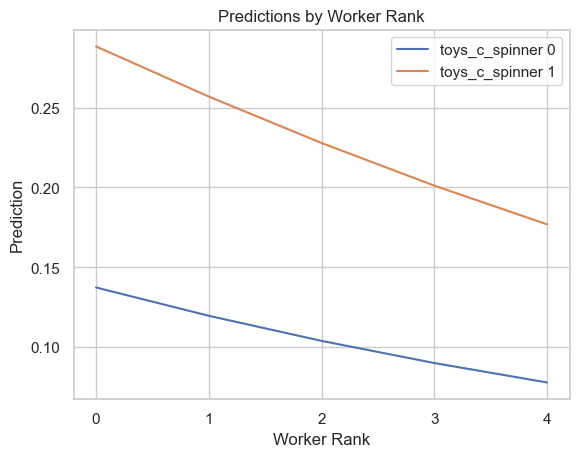

In [36]:
plt.plot(rating_range, results0, label='toys_c_spinner 0')
plt.plot(rating_range, results1, label='toys_c_spinner 1')  
plt.xlabel('Worker Rank')
plt.ylabel('Prediction')
plt.title('Predictions by Worker Rank')
plt.xticks(list(rating_range))
plt.legend() 
plt.grid(True)
plt.show()

## According to the graph, it can be observed that spinner is more prone to accidents compared to non_spinner based on the workers ranking

# Q9

In [37]:
odds_spiner = pd.DataFrame({'worker_rank': rating_range,'spiner_0': results0,'spiner_1': results1})

In [38]:
results0

[0.13734813391840933,
 0.11963327801497275,
 0.10392798071146286,
 0.0900735067031518,
 0.07790537776520404]

In [39]:
odds_spiner['odds_0'] = odds_spiner['spiner_0'] / (1 - odds_spiner['spiner_0'])
odds_spiner['odds_1'] = odds_spiner['spiner_1'] / (1 - odds_spiner['spiner_1'])
odds_spiner['odds_ratio']=odds_spiner['odds_1'] / odds_spiner['odds_0']
odds_spiner['log_odds_ratio']=np.log(odds_spiner['odds_ratio'])
odds_spiner

,worker_rank,spiner_0,spiner_1,odds_0,odds_1,odds_ratio,log_odds_ratio
0,0,0.137348,0.288217,0.159216,0.404922,2.54322,0.933431
1,1,0.119633,0.256836,0.135890,0.345599,2.54322,0.933431
2,2,0.103928,0.227780,0.115982,0.294967,2.54322,0.933431
3,3,0.090074,0.201120,0.098990,0.251753,2.54322,0.933431
4,4,0.077905,0.176867,0.084487,0.214870,2.54322,0.933431


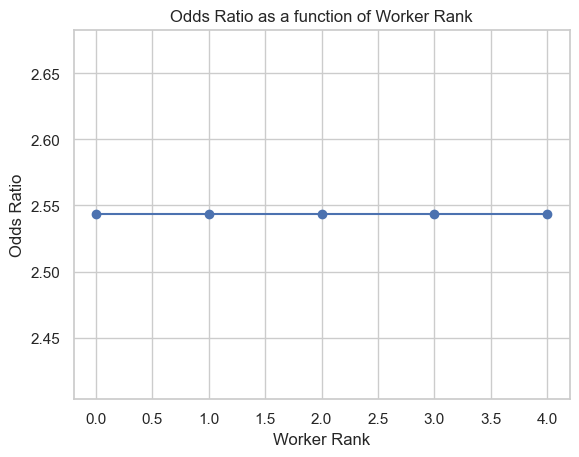

In [40]:
plt.plot(odds_spiner['odds_ratio'], marker='o')
plt.xlabel('Worker Rank')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratio as a function of Worker Rank')
#plt.grid(True)
plt.show()

# In logistic regression, for each value of the continuous variable, the odds ratio remains constant, hence we expected to obtain a straight line.

# log odds ratio = 0.933431
# The log odds ratio is equal to the value we got in the coefficient which is the coefficient of the spinner variable in the logistic equation

 # Q10 - confusion matrix

In [41]:
X_test['prob_preds'] = result2.predict(X_test[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']])
X_test['classification'] = X_test['prob_preds'].apply(lambda x: 1 if x >0.5  else 0)

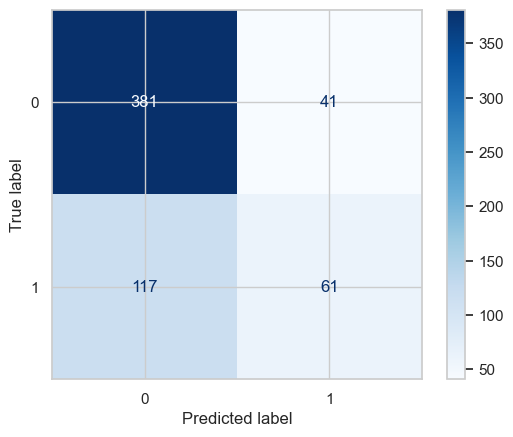

In [42]:
cm1 = confusion_matrix(y_test, X_test['classification'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=np.array([0,1]))
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [43]:
threshold_values = np.linspace(0, 1, 100)  # Generate a range of threshold values from 0 to 1

max_threshold = None
max_sensitivity = 0

for threshold in reversed(threshold_values):
    # Apply threshold to predicted probabilities
    X_test['classification'] = X_test['prob_preds'].apply(lambda x: 1 if x > threshold else 0)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, X_test['classification'])
    
    # Calculate sensitivity
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # True positive / (False negative + True positive)
    
    # Update maximum sensitivity and threshold if sensitivity is at least 0.8
    if sensitivity >= 0.8:
        max_threshold = threshold
        max_sensitivity = sensitivity
        break

print("Maximum threshold value with sensitivity at least 0.8:", max_threshold)

Maximum threshold value with sensitivity at least 0.8: 0.21212121212121213


# Q11

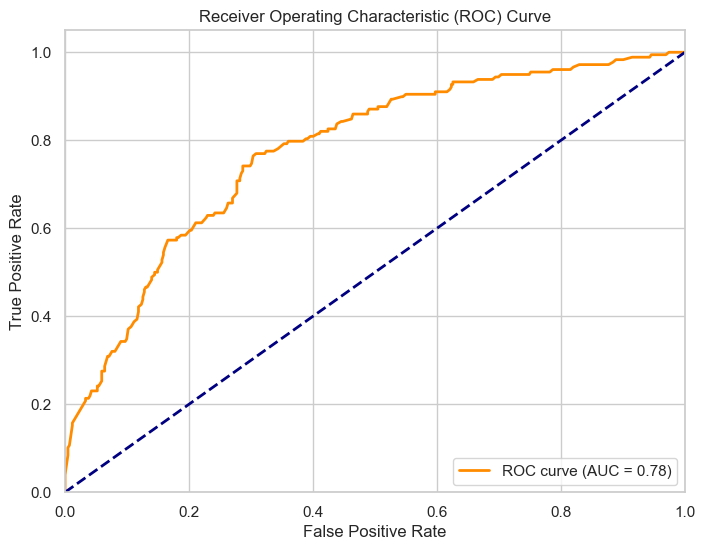

AUC: 0.7766987060013846


In [44]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
prob_preds = result2.predict(X_test[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']])

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, prob_preds)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC
print("AUC:", roc_auc)

# Q12

## Removing a categorical variable

In [45]:
X_train_no_spinner = X_train_2[['hour','worker_rank','days_c_Monday','days_c_Wednesday']]

In [46]:
logit_model=sm.Logit(y_train_2,X_train_no_spinner[['hour','worker_rank','days_c_Monday','days_c_Wednesday']])
result3=logit_model.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.520982
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.1653
Time:                        02:23:48   Log-Likelihood:                -729.38
converged:                       True   LL-Null:                       -873.81
Covariance Type:            nonrobust   LLR p-value:                 2.557e-62
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour                -0.2305      0.016    -14.266      0.000      -0.262      -0.199
worker_rank

In [47]:
X_test_no_spinner= X_test[['hour','days_c_Monday','days_c_Wednesday','toys_c_spinner']]

## Removing a continuous variable

In [48]:
X_train_no_worker_rank = X_train_2[['hour','days_c_Monday','days_c_Wednesday','toys_c_spinner']]

In [49]:
logit_model=sm.Logit(y_train_2,X_train_no_worker_rank[['hour','days_c_Monday','days_c_Wednesday','toys_c_spinner']])
result4=logit_model.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.506947
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.1878
Time:                        02:23:48   Log-Likelihood:                -709.73
converged:                       True   LL-Null:                       -873.81
Covariance Type:            nonrobust   LLR p-value:                 7.974e-71
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour                -0.2982      0.018    -16.487      0.000      -0.334      -0.263
days_c_Mond

In [50]:
X_test_no_worker_rank= X_test[['hour','days_c_Monday','days_c_Wednesday','toys_c_spinner']]

## All together

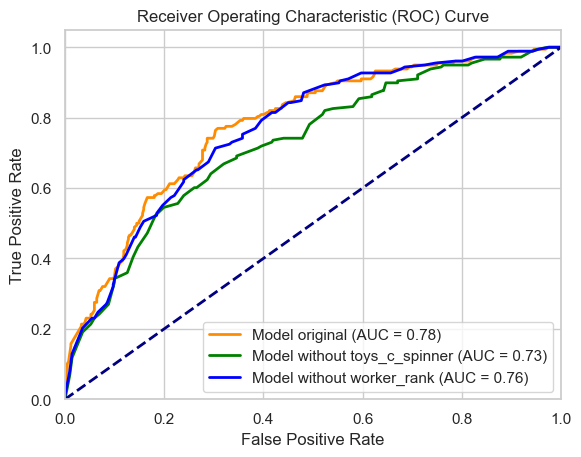

In [51]:
predicted_probabilities2 = result2.predict(X_test[['hour','worker_rank','days_c_Monday','days_c_Wednesday','toys_c_spinner']])
predicted_probabilities3 = result3.predict(X_test_no_spinner)
predicted_probabilities4 = result4.predict(X_test_no_worker_rank)

fpr2, tpr2, _ = roc_curve(y_test, predicted_probabilities2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, predicted_probabilities3)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test, predicted_probabilities4)
roc_auc4 = auc(fpr4, tpr4)

plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='Model original (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Model without toys_c_spinner (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='blue', lw=2, label='Model without worker_rank (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### After removing the continuous variable 'area' from the model, the model became smaller compared to when we removed the categorical variable. This is because the continuous variable has a greater influence on the model's quality. The predictive performance decreases when removing a continuous variable

# חלק 2

In [52]:
df_driver = pkl.load(open('drunk_driver_grpoup_21.pkl', 'rb'))
df_driver.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver
0,2.771628,1.0,23,17,2,male,morning,0
1,8.847087,1.0,37,24,3,female,morning,0
2,9.200364,1.0,32,19,3,male,morning,0
3,14.018868,1.0,19,17,1,female,evening,0
4,10.592395,1.0,36,23,1,female,morning,1


In [53]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   road_lenght       10000 non-null  float64
 1   intercept         10000 non-null  float64
 2   age               10000 non-null  int32  
 3   liscene_year      10000 non-null  int32  
 4   num_in_car        10000 non-null  int32  
 5   geneder__c        10000 non-null  object 
 6   day_time_rand__c  10000 non-null  object 
 7   drunk_driver      10000 non-null  int32  
dtypes: float64(2), int32(4), object(2)
memory usage: 468.9+ KB


In [54]:
df_driver.isna().sum()

road_lenght         0
intercept           0
age                 0
liscene_year        0
num_in_car          0
geneder__c          0
day_time_rand__c    0
drunk_driver        0
dtype: int64

In [55]:
df_driver.shape

(10000, 8)

In [56]:
df_driver.columns

Index(['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car',
       'geneder__c', 'day_time_rand__c', 'drunk_driver'],
      dtype='object')

# Q1

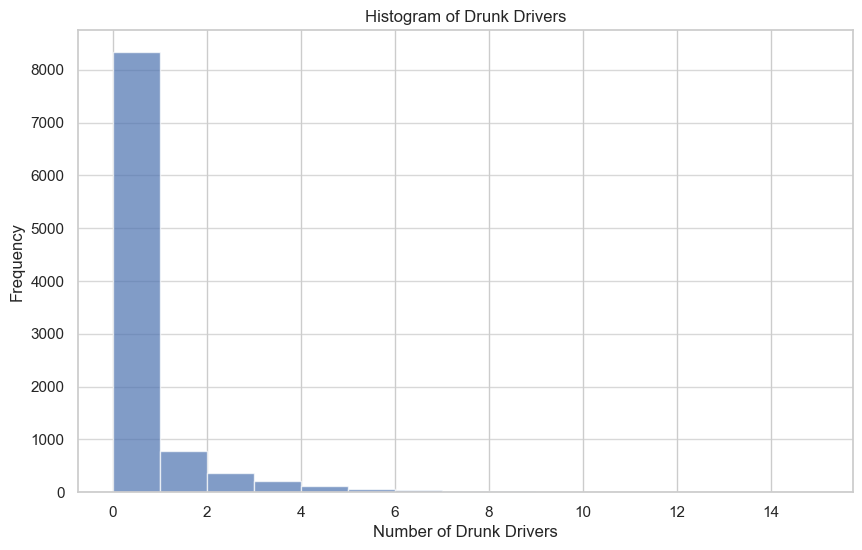

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df_driver['drunk_driver'], bins=15, alpha=0.7)
plt.title('Histogram of Drunk Drivers')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

<div dir="rtl">

#### ההיסטוגרמה מציגה את התפלגות התדירויות לפי כמות נהגים שיכורים שנתפסו בכבישים שונים בחודש ינואר.
#### מההיסטוגרמה אפשר לראות שרוב הנתונים מתרכזים בקצוות הנמוכים (0-4), ז"א שברוב הכבישים יש כמות קטנה מאוד/אפסית של נהגים שיכורים שנתפסו

# Q2

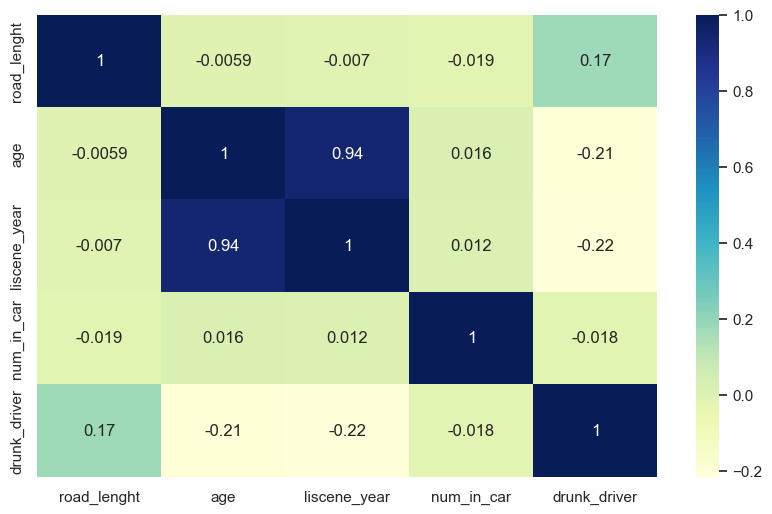

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df_driver[['road_lenght','age','liscene_year','num_in_car','drunk_driver']].corr(), annot=True, cmap='YlGnBu')
plt.show()

<Figure size 1000x600 with 0 Axes>

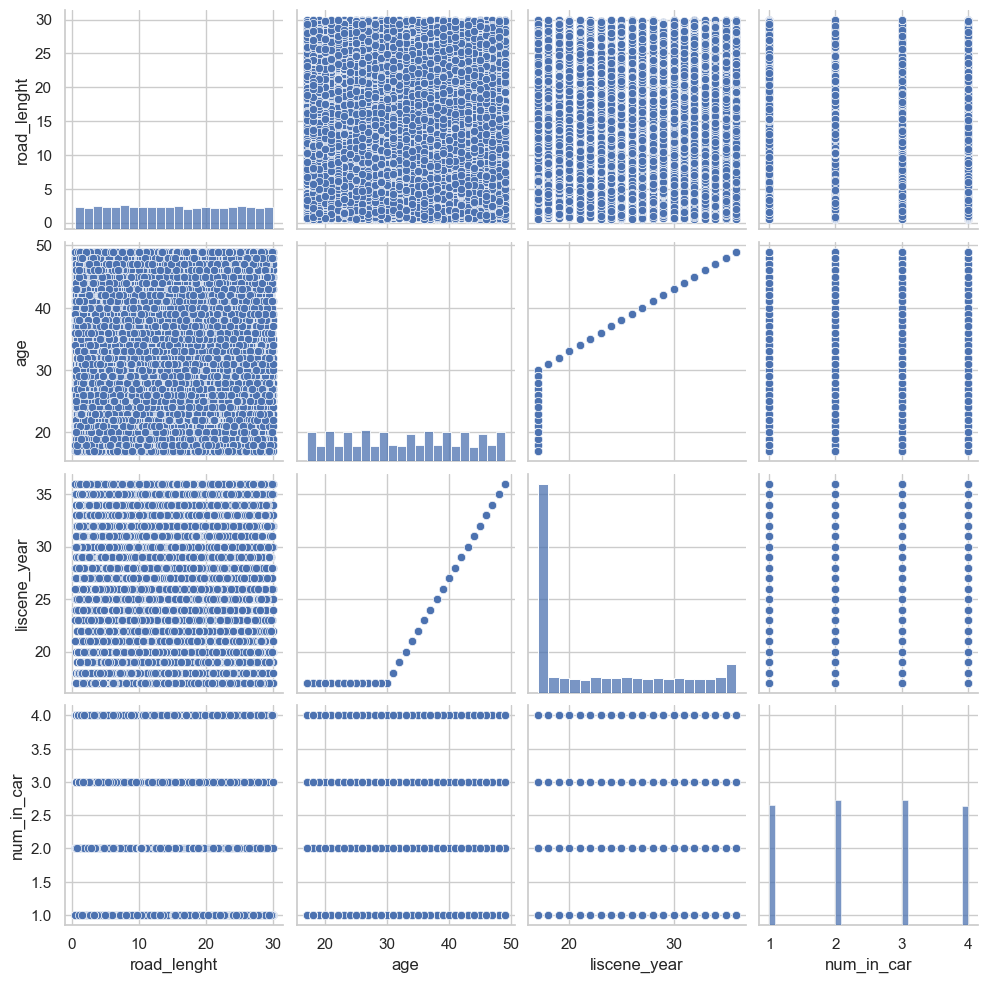

In [59]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_driver[['road_lenght','age','liscene_year','num_in_car']])
plt.show()

<div dir="rtl">

### יש קשר חזק של 0.94 בין הגיל של הנהג למספר השנים שיש לו רישיון
### ישנו קשר חיובי חזק מאחר וגודל מספר שנות הרישיון תלוי גם בגיל.

# Q3

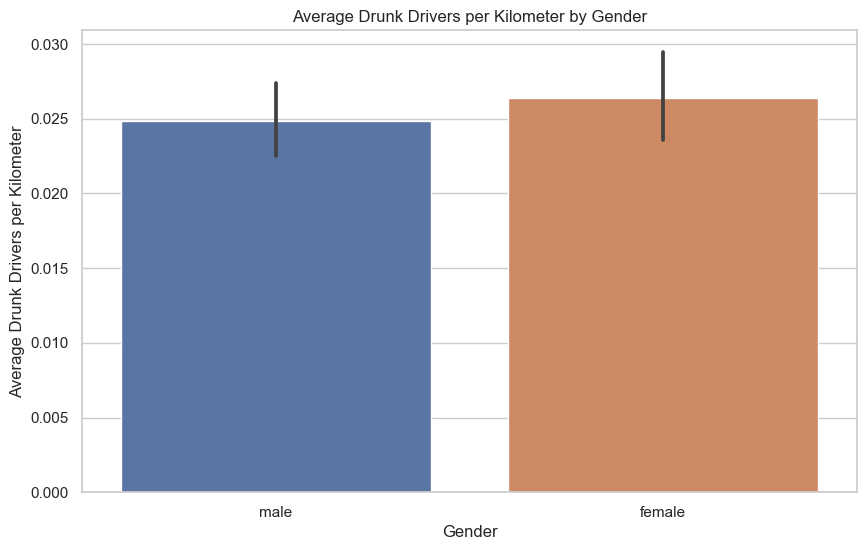

In [60]:
df_driver["drunk_per_km"] = df_driver["drunk_driver"] / df_driver["road_lenght"]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_driver, x="geneder__c", y="drunk_per_km")

# Add title and labels
plt.title('Average Drunk Drivers per Kilometer by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Drunk Drivers per Kilometer')

# Show the plot
plt.show()

<div dir="rtl">

####  מהגרף ניתן להסיק שקבוצת הנשים מועדת לפורענות יותר מקבוצת הגברים 

### Q4

In [61]:
df_driver= pd.get_dummies(df_driver, columns=['geneder__c', 'day_time_rand__c'],drop_first=True)
df_driver.head()

,road_lenght,intercept,age,liscene_year,num_in_car,drunk_driver,drunk_per_km,geneder__c_male,day_time_rand__c_evening,day_time_rand__c_morning,day_time_rand__c_night
0,2.771628,1.0,23,17,2,0,0.000000,1,0,1,0
1,8.847087,1.0,37,24,3,0,0.000000,0,0,1,0
2,9.200364,1.0,32,19,3,0,0.000000,1,0,1,0
3,14.018868,1.0,19,17,1,0,0.000000,0,1,0,0
4,10.592395,1.0,36,23,1,1,0.094407,0,0,1,0


In [62]:
X= df_driver[['road_lenght',"intercept","age",'liscene_year',"num_in_car",'geneder__c_male','day_time_rand__c_evening', 'day_time_rand__c_morning','day_time_rand__c_night']]
Y = df_driver['drunk_driver']
# Create aYlinear regression model
model = sm.OLS(Y, X)
### OLS means ordinary least square - means its a linear regression model
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          3.67e-168
Time:                        02:23:58   Log-Likelihood:                -15537.
No. Observations:               10000   AIC:                         3.109e+04
Df Residuals:                    9991   BIC:                         3.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

In [63]:
X1= df_driver[['road_lenght',"intercept" , 'liscene_year','geneder__c_male','day_time_rand__c_evening', 'day_time_rand__c_morning','day_time_rand__c_night']]
Y1 = df_driver['drunk_driver']

<div dir="rtl">

####  הוצאנו משתנים שלא עומדים בפי ווליו (age, num in car)

In [64]:
# Create aYlinear regression model
model1 = sm.OLS(Y1, X1)
### OLS means ordinary least square - means its a linear regression model
# Fit the model
results1 = model1.fit()
# Print summary statistics, including p-values for each coefficient
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     138.9
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          1.21e-169
Time:                        02:23:58   Log-Likelihood:                -15538.
No. Observations:               10000   AIC:                         3.109e+04
Df Residuals:                    9993   BIC:                         3.114e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

In [65]:
inp = np.array([[10,1,20,10,1,0,1]])
pred =results1.predict(inp)
pred

array([0.22175465])

# Q5

<div dir="rtl">

### שוויון שונויות

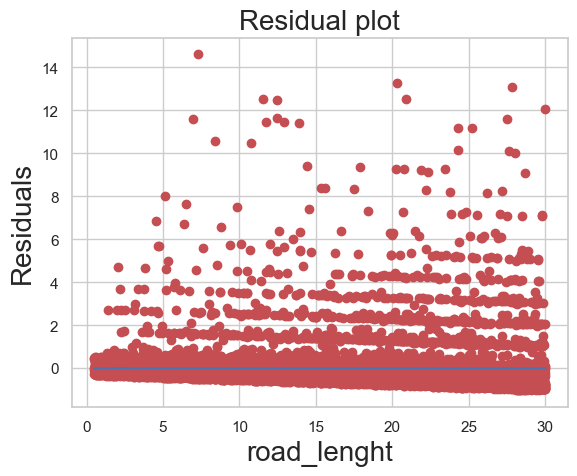

In [66]:
plt.figure()
plt.scatter(df_driver['road_lenght'], results1.resid, color = 'r')
plt.plot(df_driver['road_lenght'], np.zeros(df_driver['road_lenght'].shape[0]))
plt.xlabel('road_lenght', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Residual plot', fontsize = 20)
plt.show()

<div dir="rtl">

#### הפיזור לא נשאר שווה לאורך ציר האיקס ולכן הנחת המודל אינה מתקיימת
#### הקו האופקי הכחול מייצג את היתרון או החסרון בין ערך התחזית של המודל לבין המציאות. אם הנקודה נמצאת מעל לקו, זה אומר שהמודל קיבל תחזית גבוהה יותר מהמציאות, ואם היא מתחת לקו, זה אומר שהמודל קיבל תחזית נמוכה יותר מהמציאות.

<div dir="rtl"> 

### התפלגות נורמלית של השגיאות

In [67]:
## mean value of the errors
mean_val = (results1.resid-results1.predict()).mean()
## standard deviation value of the errors
std_val = (results1.resid-results1.predict()).std()

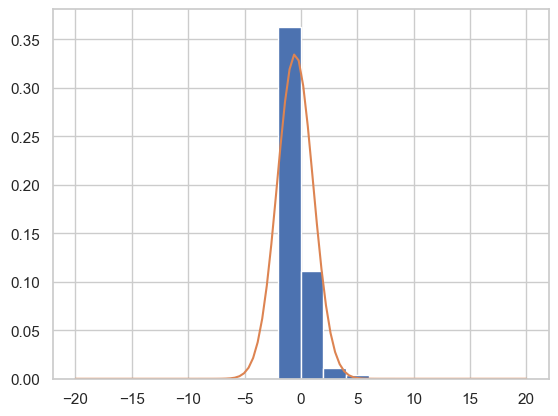

In [68]:
plt.figure()
plt.hist(results1.resid-results1.predict(), bins=8, density=True)
plt.plot(np.linspace(-20, 20, 100), scipy.stats.norm(mean_val, std_val).pdf(np.linspace(-15, 15, 100)))
plt.show()

<div dir="rtl">

####  השגיאות מתפלגות נורמלית . ניתן לראות לפי הגרף בצורה ויזואלית. 

<div dir="rtl">

#### מכיוון שאחת מההנחות לא מתקיימת הנחת המודל לא מתקיימת.

# Q6

In [69]:
model_poisson1 = sm.GLM(df_driver['drunk_driver'], X, family=sm.families.Poisson(), offset=np.log(df_driver['road_lenght']))  # Poisson regression model
results_poisson1 = model_poisson1.fit()
print(results_poisson1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8340.7
Date:                Wed, 03 Apr 2024   Deviance:                       12441.
Time:                        02:24:00   Pearson chi2:                 3.22e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2055
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

<div dir="rtl">

####  הוצאנו משתנים שלא עומדים בפי ווליו

In [70]:
model_poisson2 = sm.GLM(df_driver['drunk_driver'], df_driver[['road_lenght','intercept','age','liscene_year','num_in_car','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']], family=sm.families.Poisson(), offset=np.log(df_driver['road_lenght']))  # Poisson regression model
results_poisson2 = model_poisson2.fit()
print(results_poisson2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8340.8
Date:                Wed, 03 Apr 2024   Deviance:                       12441.
Time:                        02:24:00   Pearson chi2:                 3.23e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2055
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

# Q7

<div dir="rtl">

### מבחן 1 - מבחן השערות תוחלת ושונות

In [71]:
df_driver['predictions'] = results_poisson2.fittedvalues

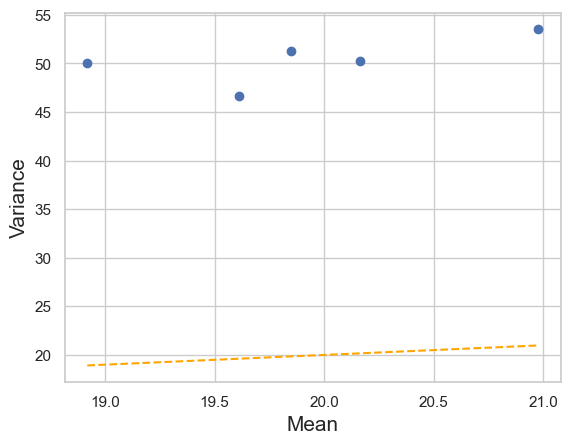

In [72]:
lams = np.linspace(0,249, 200)
means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = df_driver.loc[(df_driver['drunk_driver']>lb)& (df_driver['drunk_driver']<ub), 'road_lenght'].shape
    var = df_driver.loc[(df_driver['drunk_driver']>lb)& (df_driver['drunk_driver']<ub), 'road_lenght'].std()**2
    mean = df_driver.loc[(df_driver['drunk_driver']>lb)& (df_driver['drunk_driver']<ub), 'road_lenght'].mean()
    
    if shape[0] > 20:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

<div dir="rtl">

#### אנחנו רואים פה שהשונות שונה מהתוחלת ולכן זה לא כמו במ"מ פואסון

<div dir="rtl">

### מבחן 2 - R

In [73]:
results_poisson2.pearson_chi2
results_poisson2.df_resid

R = results_poisson2.pearson_chi2/results_poisson2.df_resid
print(R) 

3.2292047300237416


<div dir="rtl">

#### R > 1 ולכן ניתן להסיק שהשגיאות לא מתפלגות פואסונית

<div dir="rtl">

### מבחן 3 - מובהקות 

#### <div dir="rtl"> נסתכל אם 0.95 מהשגיאות בין תוך 2 סטיות תקן מהממוצע:

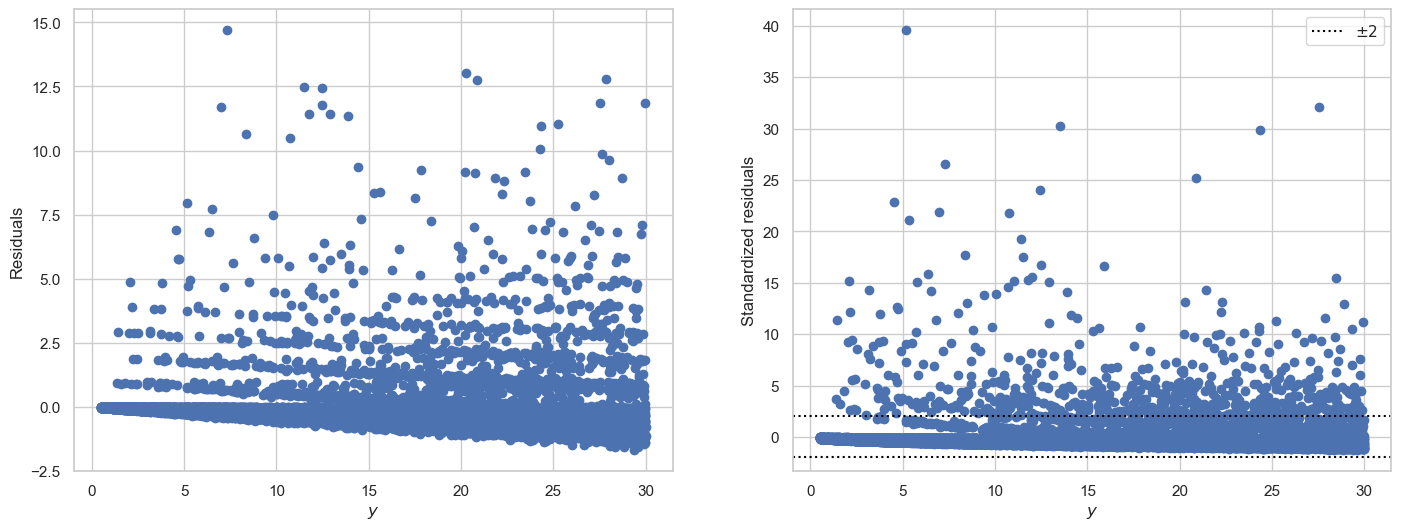

In [74]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(df_driver['road_lenght'], results_poisson2.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(df_driver['road_lenght'], results_poisson2.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

<div dir="rtl">
    
#### נראה כי הנתונים מתפזרים מחוץ לתחום של 95% ולכן דוחים את הנחת התפלגות פואסון

<div dir="rtl">

### מבחן 4 - מבחן השערות

<div dir="rtl">

#### H0 : שגיאות מתפלגות פואסונית - 
#### H1 : שגיאות לא מתפלגות פואסונית


In [75]:
from scipy.stats import chi2

df_driver2 = results_poisson2.df_resid
p_value = 1 - chi2.cdf(results_poisson2.pearson_chi2, df_driver2)

print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


<div dir="rtl">

#### קיבלנו pvalue 0.0 - כלומר  עלינו לדחות את השערת האפס - השגיאות לא מתפלגות פואסונית


<div dir="rtl">
    
#### מאחר ולא כל 4 המבחנים מתקיימים נעשה רגרסיה בינומית שלילית

# Q8

### $ Var[X] =  E[X]+\frac{E[X]^2}{\alpha} $

In [76]:
from statsmodels.discrete.discrete_model import NegativeBinomial

nb = NegativeBinomial(Y,X.drop(columns = ['road_lenght']),
                      offset=np.log(X["road_lenght"]))
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

         Current function value: 0.648757
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 48
0    3.946559
Name: alpha, dtype: float64


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
alpha = pd.DataFrame(result.params).loc['alpha',:][0]
model_NB = sm.GLM(Y,X.drop(columns = ['road_lenght']),
                  offset=np.log(X["road_lenght"]),
                  family=sm.families.NegativeBinomial(alpha=alpha))

result_NB = model_NB.fit()
print(result_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6487.6
Date:                Wed, 03 Apr 2024   Deviance:                       4446.7
Time:                        02:24:03   Pearson chi2:                 1.70e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.09467
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

<div dir="rtl">

####  הוצאנו משתנים לא מובהקים וחישוב מחדש של המודל.

In [78]:
nb1 = NegativeBinomial(Y,X.drop(columns = ['road_lenght','intercept','num_in_car','geneder__c_male','day_time_rand__c_morning','day_time_rand__c_night']),
                      offset=np.log(X["road_lenght"]))
result1 = nb1.fit()
print(pd.DataFrame(result1.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 0.649017
         Iterations: 19
         Function evaluations: 29
         Gradient evaluations: 29
0    3.958468
Name: alpha, dtype: float64


In [79]:
alpha1 = pd.DataFrame(result.params).loc['alpha',:][0]
model_NB1 = sm.GLM(Y,X.drop(columns = ['road_lenght','intercept','num_in_car','geneder__c_male','day_time_rand__c_morning','day_time_rand__c_night']),
                  offset=np.log(X["road_lenght"]),
                  family=sm.families.NegativeBinomial(alpha=alpha1))

result_NB1 = model_NB1.fit()
print(result_NB1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6490.2
Date:                Wed, 03 Apr 2024   Deviance:                       4451.9
Time:                        02:24:03   Pearson chi2:                 1.71e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09420
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                     

<div dir="rtl">
    
#### בדיקת השערות על רגרסיה בינומית שלילית

In [80]:
R = result_NB1.pearson_chi2 / result_NB1.df_resid
print(R) 

1.7066765859816164


<div dir="rtl">
    
#### לא יצא בידיוק 1 אבל יותר טוב מהR הקודם

96.34% of the residuals are within two standard deviations


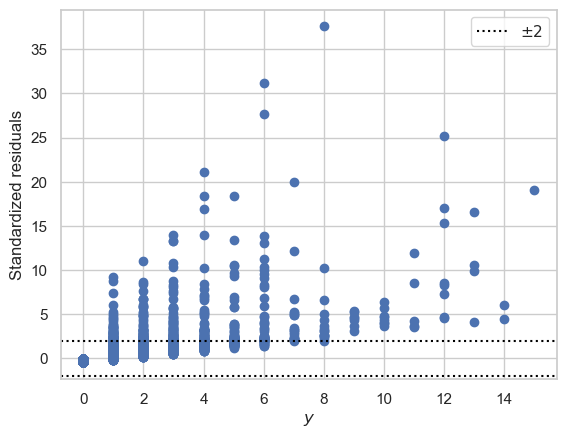

In [81]:
res_nb = result_NB1.resid_pearson

percent = len(res_nb[(res_nb>-2)&(res_nb<2)])/len(res_nb)*100
print(f"{percent}% of the residuals are within two standard deviations")

plt.figure()
plt.scatter(df_driver['drunk_driver'], res_nb)
#plt.yticks(np.arange(-6, 14, step=2))
plt.axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
plt.axhline(y=+2, linestyle=':', color='black')
plt.ylabel("Standardized residuals")
plt.xlabel("$y$")
plt.legend()
plt.show()

<div dir="rtl">

#### נראה כי הנתונים לא מתפזרים בתוך התחום של 95% ולכן ההיתפלגות אינה בינומית שלילית

# Q9

In [82]:
co_age = result_NB1.params['age']
co_liscene_year = result_NB1.params['liscene_year']
co_intercept = result_NB1.params['intercept']

KeyError: 'intercept'

In [ ]:

def surface_eq(age, liscene_year):
    return np.exp(0.0266 + 0.0200*age + 0.1064*liscene_year)

In [ ]:

X1, Y1 = np.meshgrid(df_driver['age'], df_driver['liscene_year'])
Z1 = surface_eq(X1, Y1)*1

X2, Y2 = np.meshgrid(df_driver['age'], df_driver['liscene_year'])
Z2 = surface_eq(X2, Y2)*5 

In [ ]:
%matplotlib widget

fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X1, Y1, Z1, cmap = plt.cm.cividis, alpha = 0.2)
surf2 = ax.plot_surface(X2, Y2, Z2, cmap = plt.cm.cividis, alpha = 0.2)
ax.set_xlabel('age',fontsize = 16)
ax.set_ylabel('liscene_year',fontsize = 16)
ax.set_zlabel('drunk_driver',fontsize = 16)
plt.title('Number of drunk driver' ,fontsize = 24)
fig.colorbar(surf1, shrink=0.5, aspect=8)
fig.colorbar(surf2, shrink=0.5, aspect=8)
ax.view_init(elev=50., azim=45)
plt.show()